In [2]:
# importing the desired libraries
import numpy as np 
import pandas as pd 
import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use(['fivethirtyeight'])

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


1. **ID**: Unique identifier for each customer.
2. **Year_Birth**: The birth year of the customer.
3. **Education**: The highest education level attained by the customer.
4. **Marital_Status**: The marital status of the customer (e.g., single, married, divorced).
5. **Income**: The annual household income of the customer.
6. **Kidhome**: The number of children in the customer's household.
7. **Teenhome**: The number of teenagers in the customer's household.
8. **Dt_Customer**: The date when the customer enrolled with the company.
9. **Recency**: The number of days since the customer's last purchase.
10. **MntWines**: The amount spent on wine products in the last 2 years.
11. **MntFruits**: The amount spent on fruit products in the last 2 years.
12. **MntMeatProducts**: The amount spent on meat products in the last 2 years.
13. **MntFishProducts**: The amount spent on fish products in the last 2 years.
14. **MntSweetProducts**: The amount spent on sweet products in the last 2 years.
15. **MntGoldProds**: The amount spent on 'gold' products in the last 2 years.
16. **NumDealsPurchases**: The number of purchases made with a discount.
17. **NumWebPurchases**: The number of purchases made through the company’s website.
18. **NumCatalogPurchases**: The number of purchases made using a catalog.
19. **NumStorePurchases**: The number of purchases made directly in stores.
20. **NumWebVisitsMonth**: The number of visits to the company’s website in the last month.
21. **AcceptedCmp1**: Indicator if customer accepted the offer in the 1st campaign.
22. **AcceptedCmp2**: Indicator if customer accepted the offer in the 2nd campaign.
23. **AcceptedCmp3**: Indicator if customer accepted the offer in the 3rd campaign.
24. **AcceptedCmp4**: Indicator if customer accepted the offer in the 4th campaign.
25. **AcceptedCmp5**: Indicator if customer accepted the offer in the 5th campaign.
26. **Complain**: Indicator if the customer complained in the last 2 years.
27. **Z_CostContact**: A constant value for contact cost (may be used for internal accounting; typically not useful for analysis).
28. **Z_Revenue**: A constant value for revenue (may be used for internal accounting; typically not useful for analysis).
29. **Response**: Indicator if the customer accepted trs to various marketing efforts.

In [6]:
# Check for missing values
print("Missing value:\n", data.isnull().sum()) 

Missing value:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [7]:
# Check for duplicate data
data.duplicated().sum()

0

* There are 24 missing values in the income data, which are filled in with the mean value
* Customer registration time needs to be converted to date format
* The two variables of education level and marital status needs to be re-encoded

In [8]:
# Use the mean to fill in the 24 missing data in the income column
data = data.fillna(data['Income'].mean())

In [9]:
# Adjust the data format of the registration date to the date format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')
data['Dt_Customer'].apply(['min', 'max'])

min   2012-01-08
max   2014-12-06
Name: Dt_Customer, dtype: datetime64[ns]

In [11]:
print("Marital_Status:\n",data['Marital_Status'].value_counts(), '\n')
print("Education:\n",data['Education'].value_counts())

Marital_Status:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Education:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Text(0.5, 1.0, 'Propotion of Marital_Status')

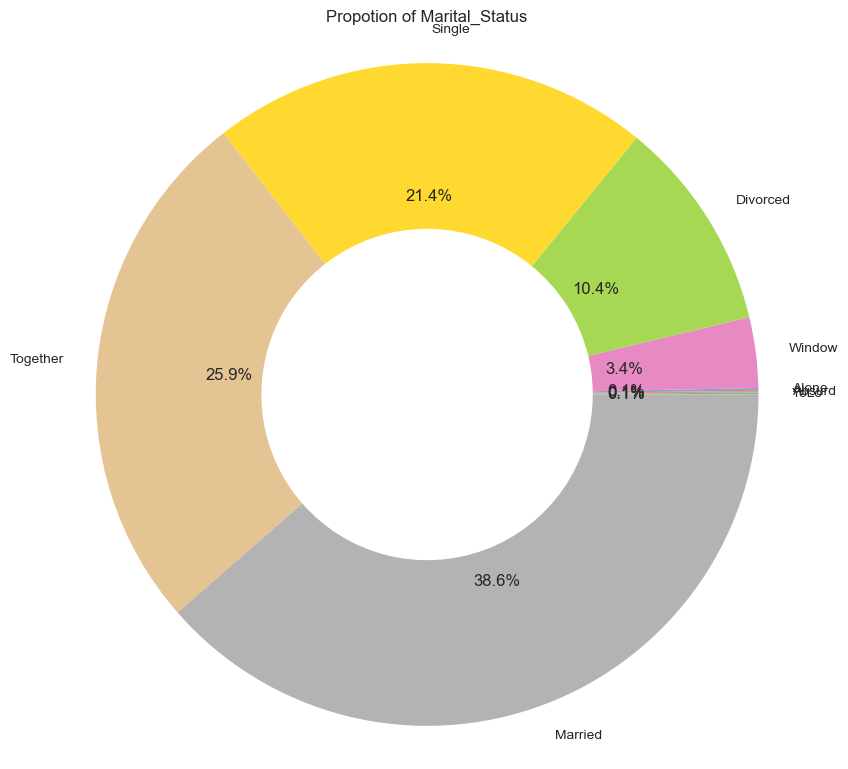

In [15]:
# Percentage of customers in different marital status
plt.figure(figsize=(9, 9))
x = data['Marital_Status'].value_counts().sort_values()
colors = plt.cm.Set2(range(len(x)))
plt.pie(x=x,colors=colors ,labels=['YoLo', 'Absurd','Alone', 'Window', 'Divorced', 'Single', 'Together','Married'],
        wedgeprops={ 'width': 0.5},autopct = '%1.1f%%' )
plt.axis('equal')
plt.title('Propotion of Marital_Status')

Text(0.5, 1.0, 'Propotion of Education')

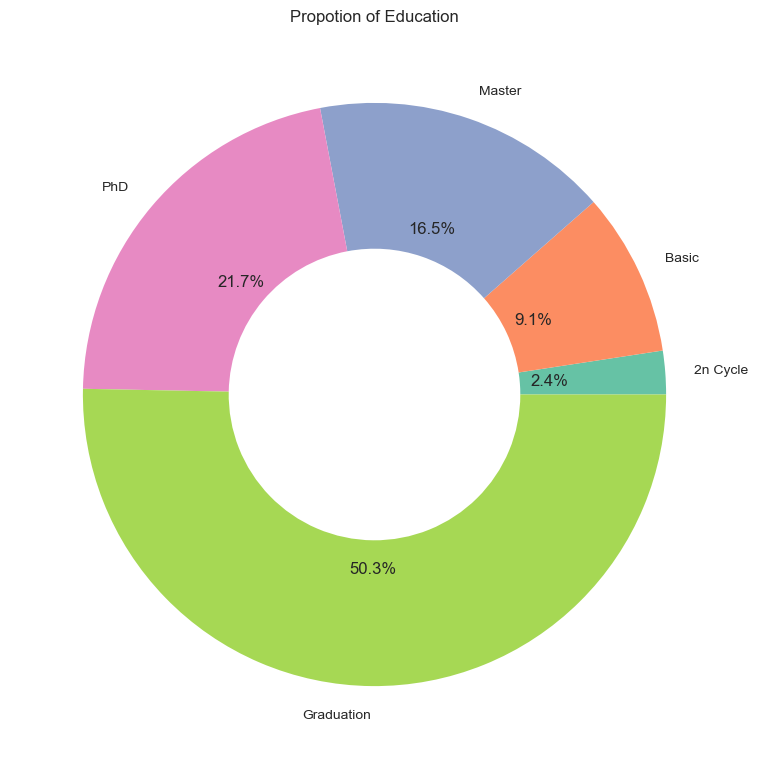

In [16]:
# Percentage of customers with different education levels
x = data['Education'].value_counts().sort_values()
colors = plt.cm.Set2(range(len(x)))
plt.figure(figsize=(9,9))
plt.pie(x=x, colors=colors, labels=['2n Cycle', 'Basic', 'Master', 'PhD', 'Graduation'], 
        wedgeprops={ 'width': 0.5},autopct = '%1.1f%%')
plt.title('Propotion of Education')

## Data Engineering

* Creating Age column with date of birth
* Creating Spent (total consumption) column
* Creating a Children column
* Creating TotalAcceptedCmp (total number of accepted quotes) column
* Creating NumTotalPurchases (total purchase quantity) column

In [18]:
data['Age'] = data.apply(lambda data:  2023- data['Year_Birth'], axis=1)
data['Spent'] = data.apply(lambda data: data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + data['MntMeatProducts'] + data['MntSweetProducts'] + data['MntWines'], axis=1)


data['Children'] = data.apply(lambda data: data['Kidhome'] + data['Teenhome'], axis=1)

data['TotalAcceptedCmp'] = data.apply(lambda data: data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'], axis=1)
data['NumTotalPurchases'] = data.apply(lambda data: data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases'], axis=1)

In [19]:
# Drop'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome' columns
data = data.drop(['Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Kidhome', 'Teenhome'], axis=1) 

In [20]:
# Delete the outliers of income and age in the data
data = data.drop(data.loc[data['Income'] > 600000].index)
data = data.drop(data.loc[data['Age'] > 100].index)

In [21]:
# Create a new feature "Have_Children", with children with a value of 1, and no children with a value of 0
data['Have_Children'] = np.where(data.Children > 0, 1, 0)
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,TotalAcceptedCmp,NumTotalPurchases,Have_Children
0,5524,Graduation,Single,58138.0,2012-04-09,58,635,88,546,172,...,0,0,0,1,66,1617,0,0,25,0
1,2174,Graduation,Single,46344.0,2014-08-03,38,11,1,6,2,...,0,0,0,0,69,27,2,0,6,1
2,4141,Graduation,Together,71613.0,NaT,26,426,49,127,111,...,0,0,0,0,58,776,0,0,21,0
3,6182,Graduation,Together,26646.0,2014-10-02,26,11,4,20,10,...,0,0,0,0,39,53,1,0,8,1
4,5324,PhD,Married,58293.0,NaT,94,173,43,118,46,...,0,0,0,0,42,422,1,0,19,1


## Data Visualization

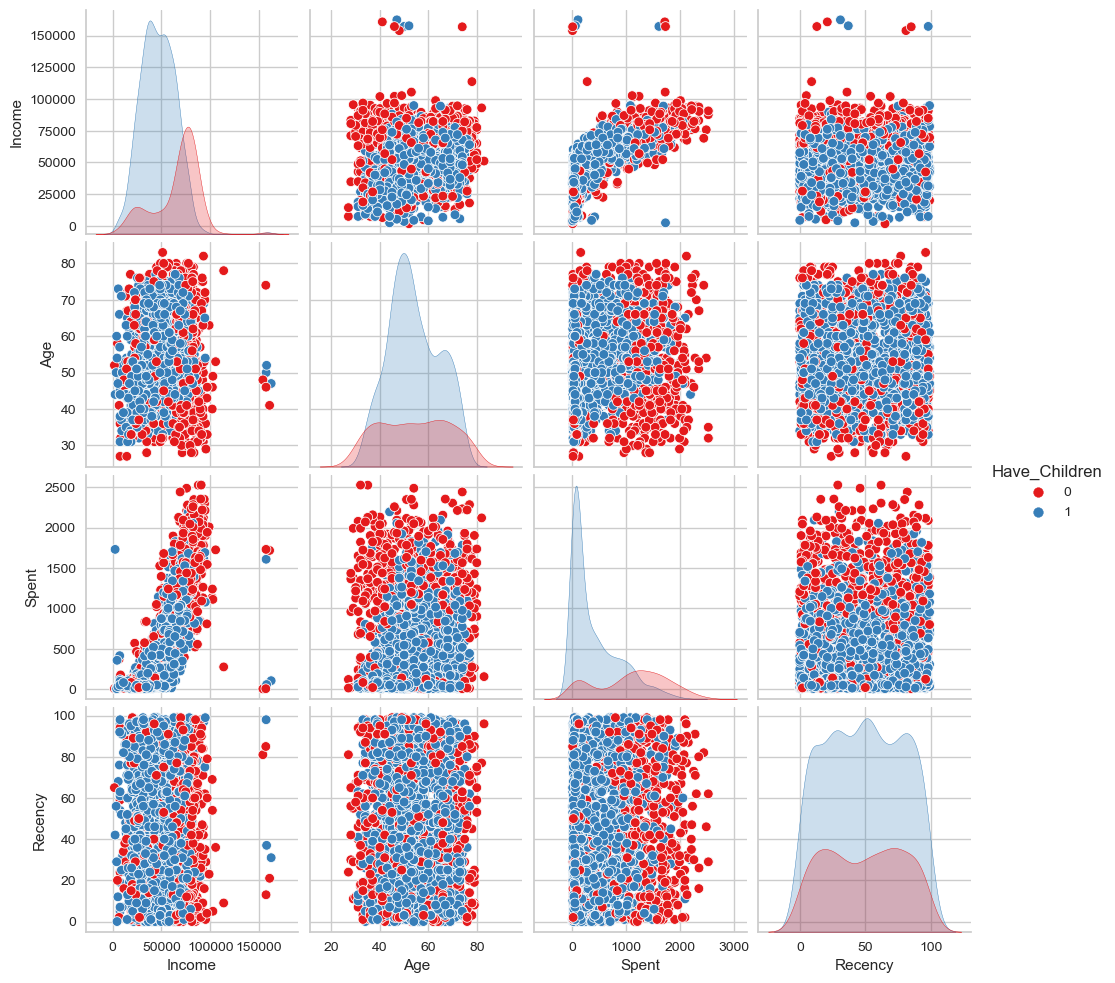

In [22]:
# Group the data based on whether there are children and draw a scatter plot matrix
pairplot = data.loc[:, ['Income', 'Age', 'Spent', 'Recency', 'Have_Children']]

sns.pairplot(pairplot, hue='Have_Children', palette='Set1')

In [23]:
# Cut the continuous variable Age
bins = [0, 20, 40, 60, 80,100]
aged = pd.cut(data['Age'], bins=bins)
print('number of age_cut:\n', aged.value_counts())

number of age_cut:
 Age
(40, 60]     1239
(60, 80]      694
(20, 40]      301
(80, 100]       2
(0, 20]         0
Name: count, dtype: int64


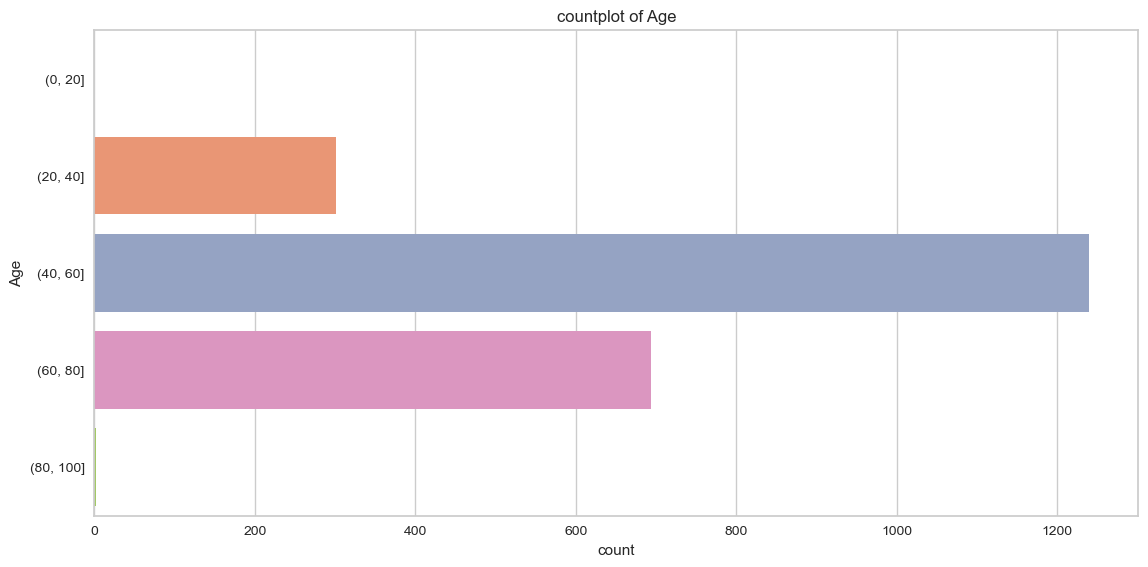

In [26]:
# Different age group customer classification summary
plt.figure(figsize=(12,6))
sns.countplot(y=aged, palette='Set2')
plt.title('countplot of Age')
plt.show()

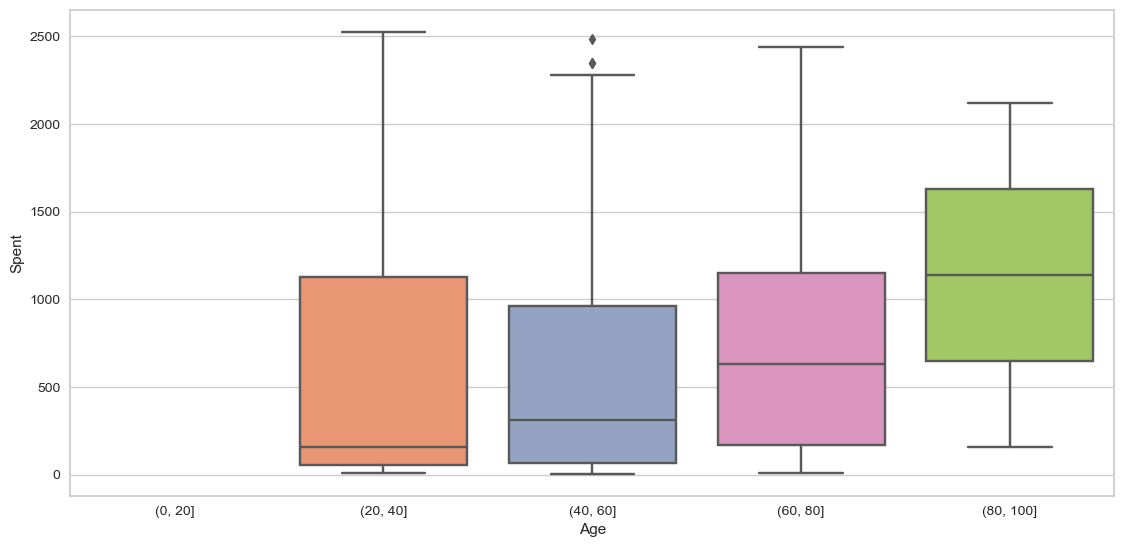

In [27]:
# Differences in shopping expenses for different age ranges
plt.figure(figsize=(12,6))
sns.boxplot(x=aged, y=data['Spent'], palette='Set2')
plt.show()

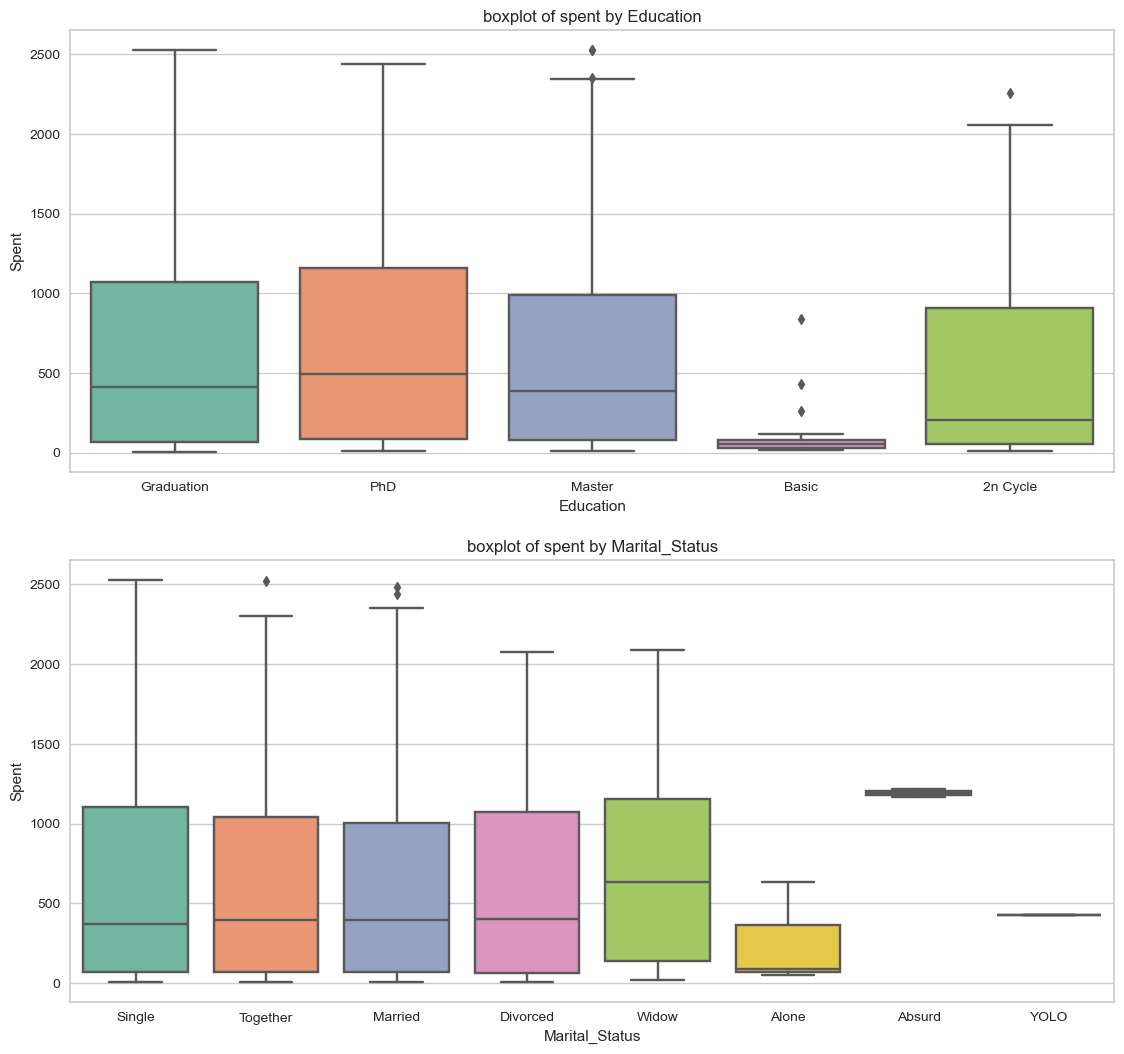

In [28]:
# The relationship between education level and shopping expenses
# Comparison of customer spending in different marital status

to_boxplot = ['Education', 'Marital_Status']
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
axes = axes.flatten()

for col, ax in zip(to_boxplot, axes):
    ax = sns.boxplot(data=data, x=col, y='Spent', ax=ax, palette='Set2')
    ax.set_title(f'boxplot of spent by {col}')

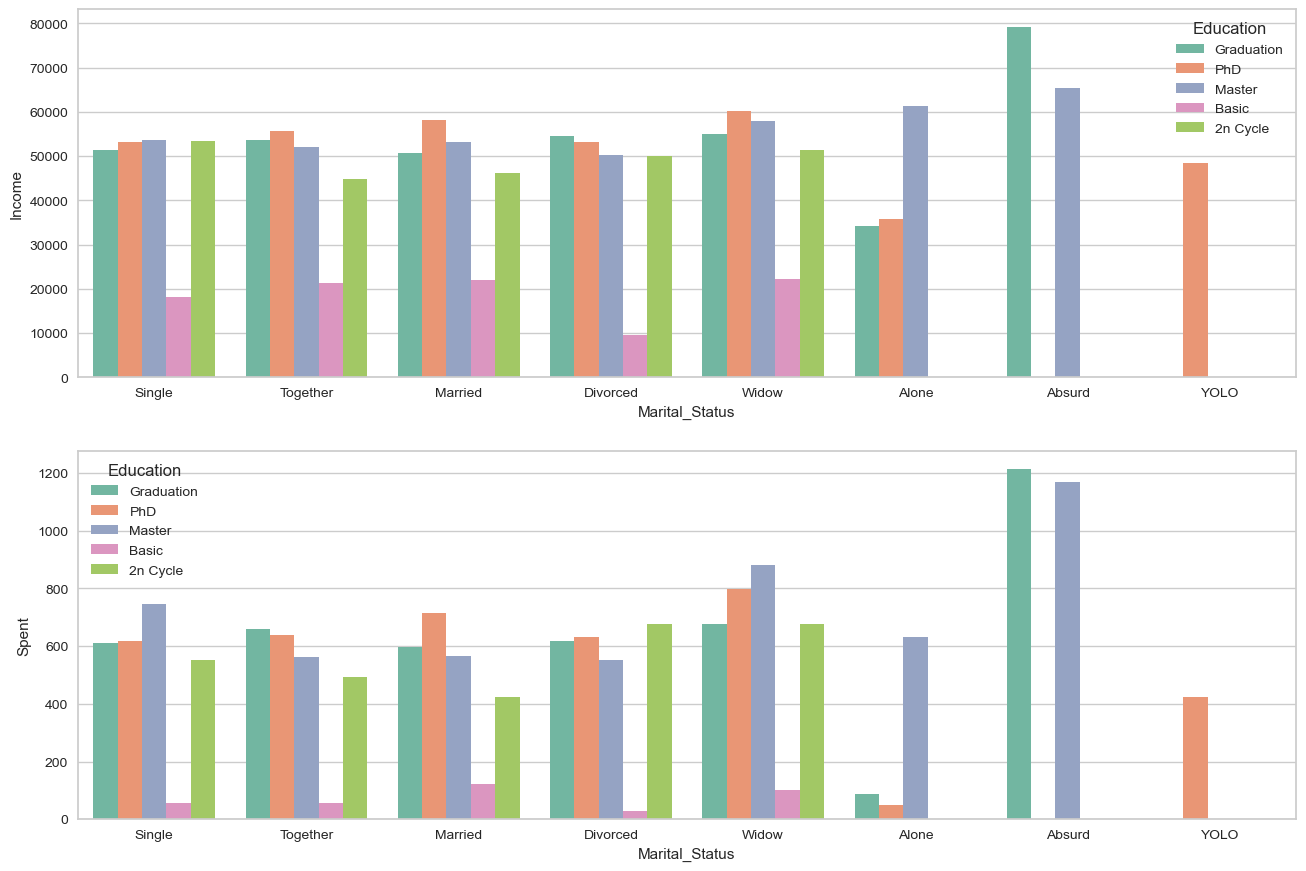

In [30]:
# Group customers with different marital status based on their education level, and compare their differences in income and shopping expenses
fig, axes = plt.subplots(2, 1, figsize=(14,10))
sns.barplot(x= 'Marital_Status',y='Income',hue='Education',data=data, ci=0,palette='Set2', ax=axes[0])
sns.barplot(x= 'Marital_Status',y='Spent',hue='Education',data=data, ci=0, palette='Set2', ax=axes[1])
plt.show()

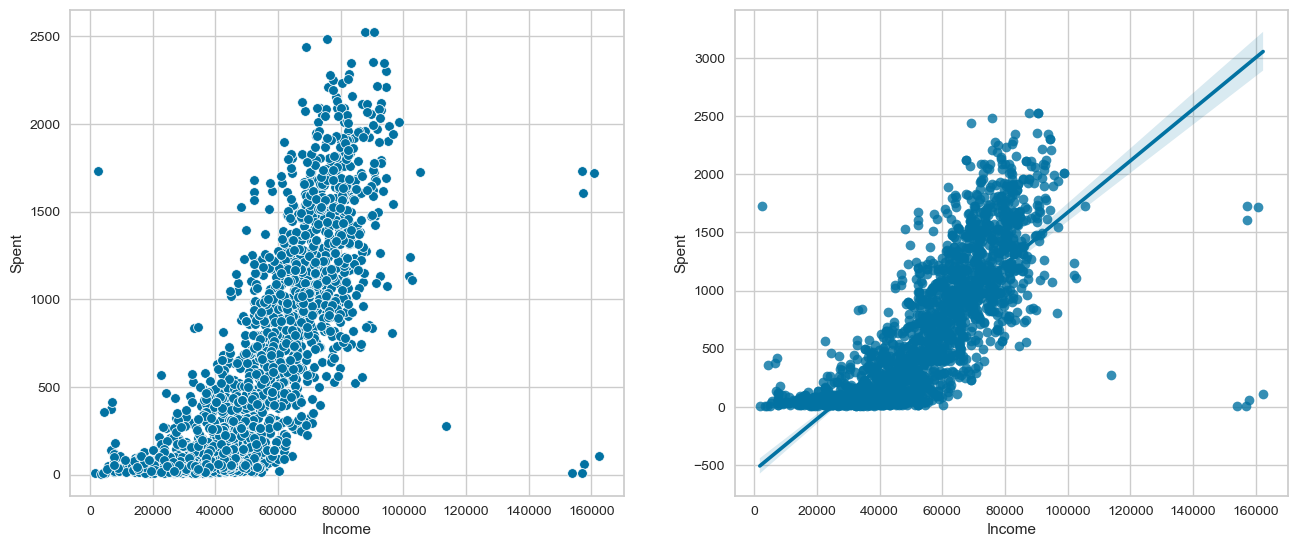

In [31]:
# Income and expenditure show a linear growth relationship
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(y=data['Spent'], x=data['Income'], ax=axes[0])
sns.regplot(y='Spent', x='Income', data=data, ax=axes[1])
plt.show()

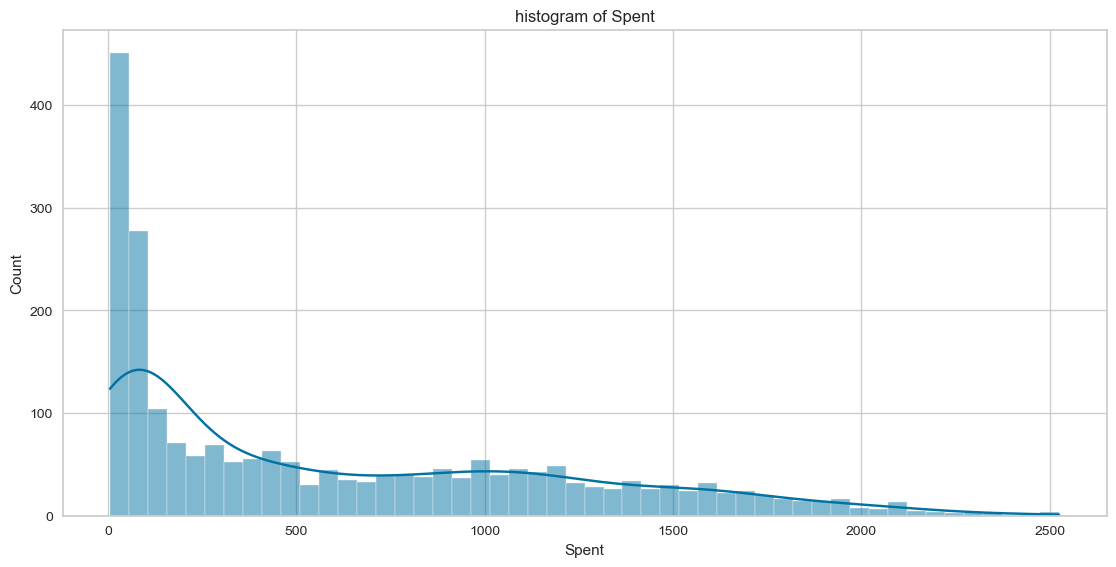

In [32]:
# Histogram of overall website customer spending
plt.figure(figsize=(12,6))
sns.histplot(data['Spent'], bins=50, kde=True)
plt.title('histogram of Spent')
plt.show()

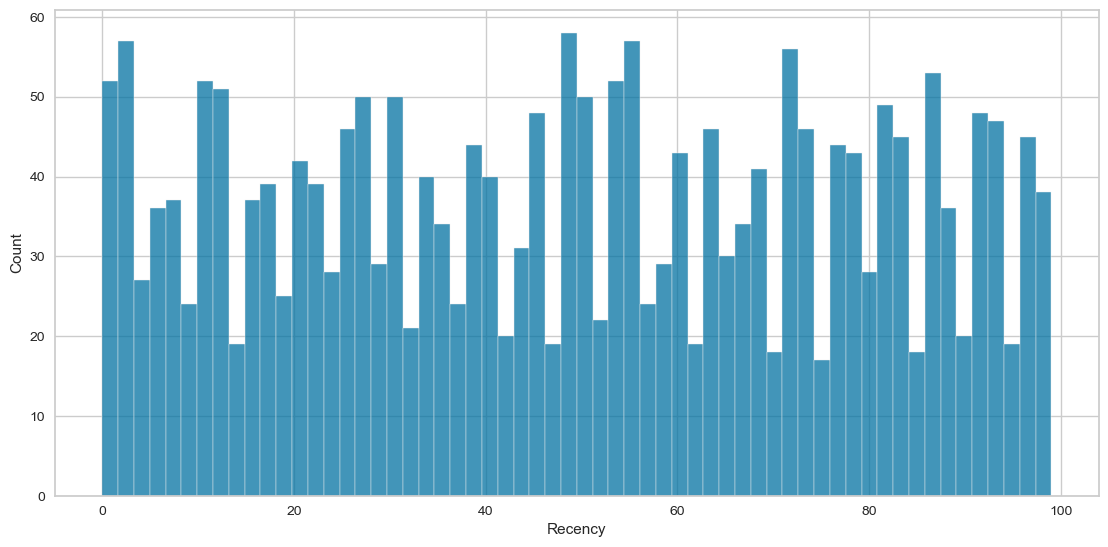

In [33]:
# Frequency distribution of the number of days since the user's last purchase
plt.figure(figsize=(12,6))
sns.histplot(data['Recency'], bins=60)
plt.show()

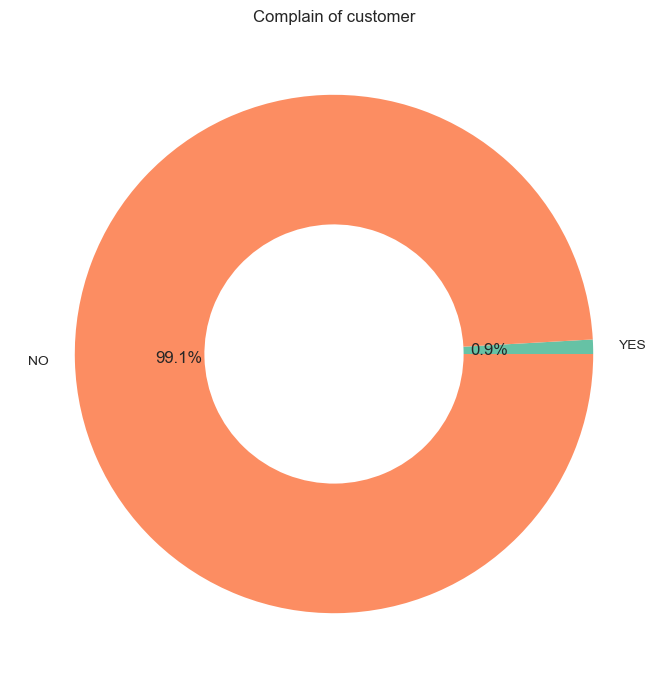

In [35]:
# Website complaints
x = data['Complain'].value_counts().sort_values()
colors = plt.cm.Set2(range(len(x)))
plt.figure(figsize=(8,8))
plt.pie(x=x, colors=colors, wedgeprops={ 'width': 0.5},
        labels=['YES', 'NO'], autopct = '%1.1f%%')
plt.title('Complain of customer')
plt.show()

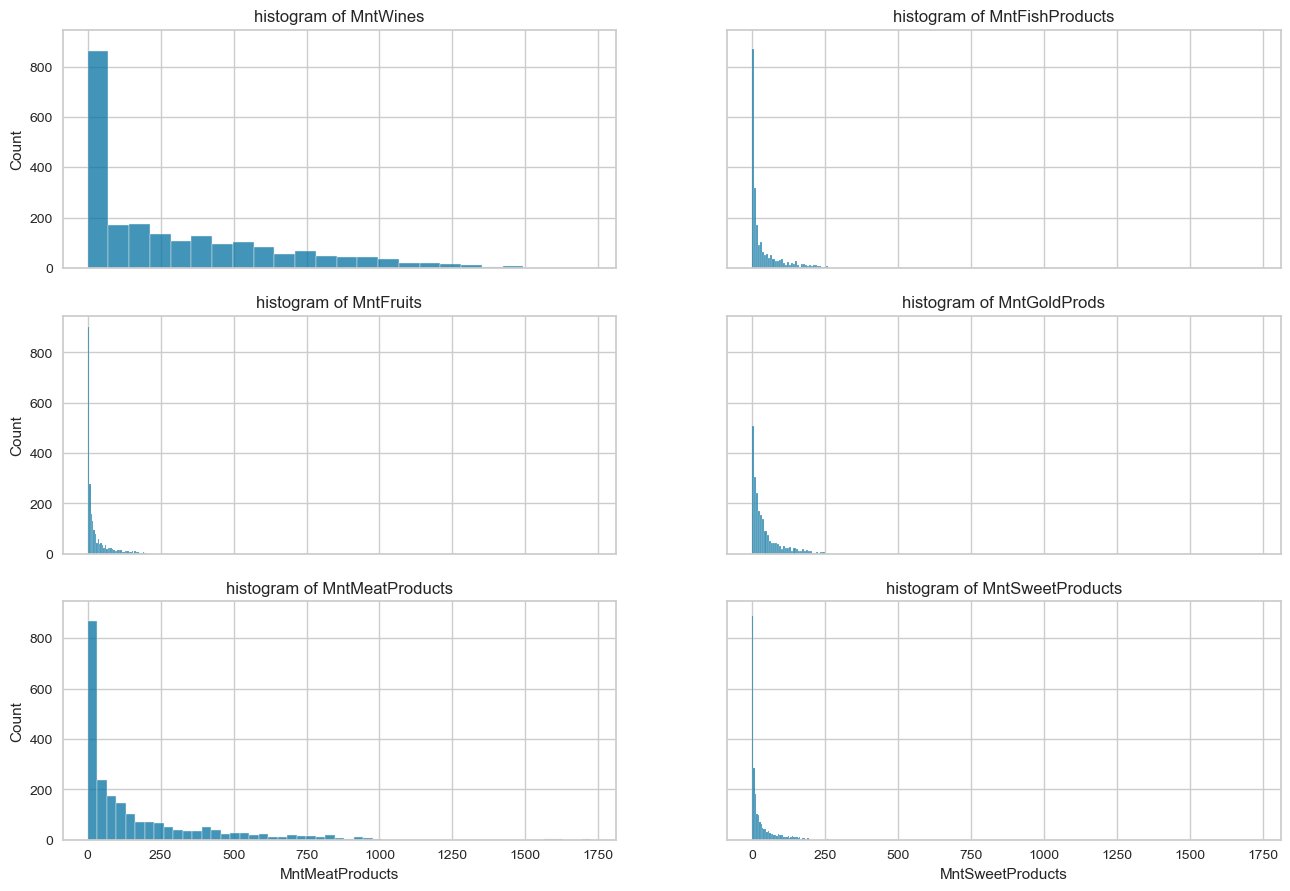

In [36]:
# Frequency statistics of 'MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts'  respective sales
to_histplot = ['MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 
               'MntMeatProducts', 'MntSweetProducts']

fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(14, 10))
axes = axes.flatten()

for col, ax in zip(to_histplot, axes):
    ax = sns.histplot(data=data, x=col, ax=ax)
    ax.set_title(f'histogram of {col}')

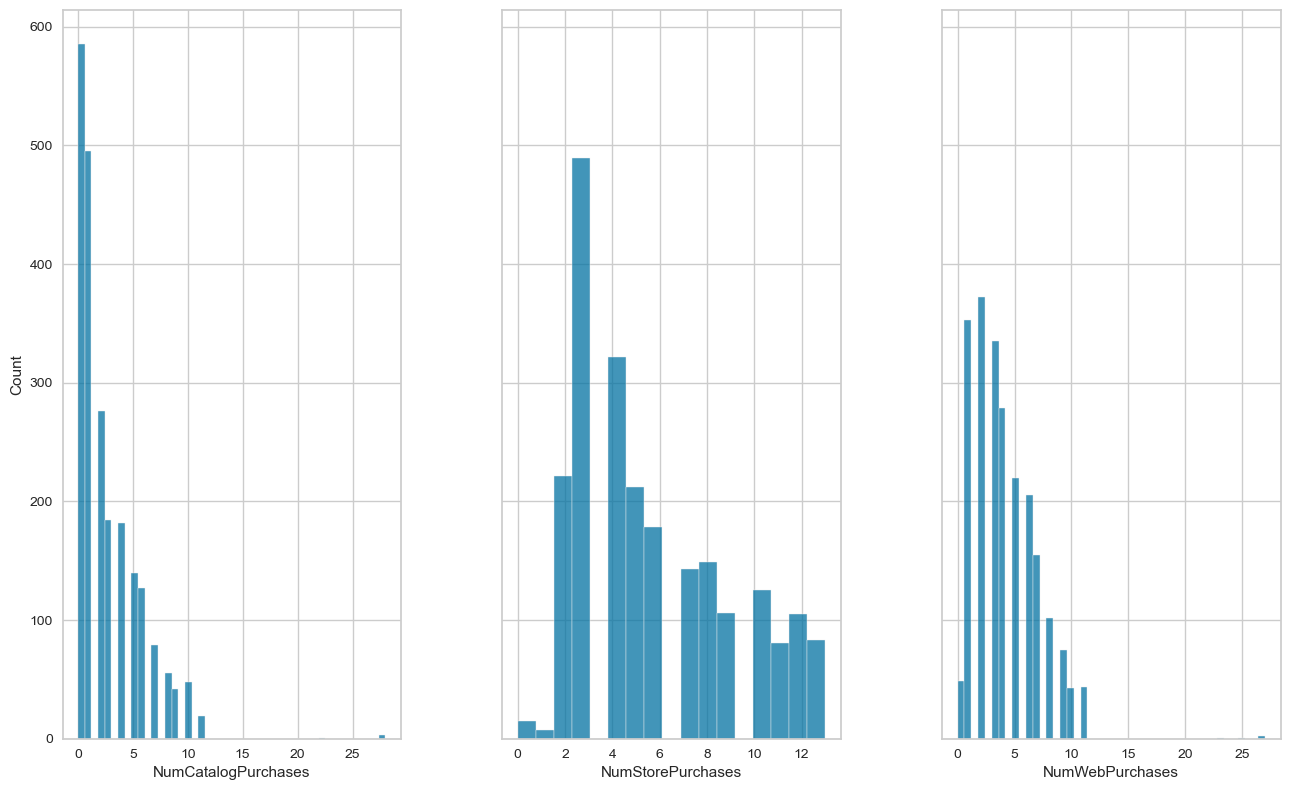

In [37]:
# Statistics of the frequency of purchases through the three channels of catalogs, stores and websites
to_histplot = ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 9))
axes = axes.flatten()

for col, ax in zip(to_histplot, axes):
    ax = sns.histplot(data=data, x=col, ax=ax)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

In [38]:
# Create an indicator of the total number of bids accepted by the activity
acceptedConcat = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
acceptedConcat = acceptedConcat.sum()

print('acceptedConcat:\n', acceptedConcat)

acceptedConcat:
 AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    162
dtype: int64


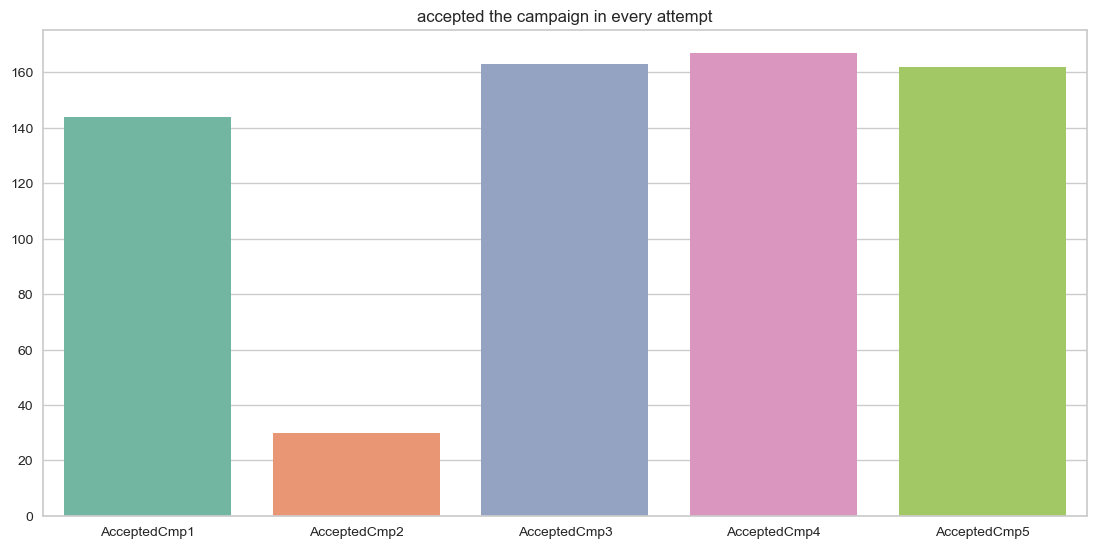

In [42]:
# Create an indicator of the total number of bids accepted by the activity
plt.figure(figsize=(12,6))
plt.title('accepted the campaign in every attempt')
sns.barplot(x=acceptedConcat.index, y=acceptedConcat, palette='Set2')
plt.show()

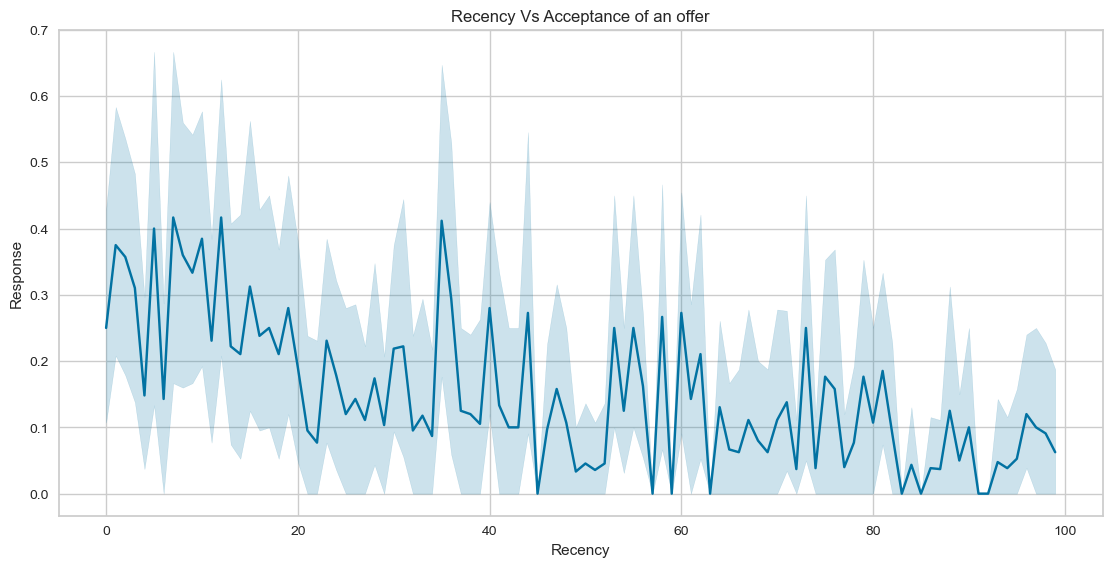

In [44]:
# The relationship between the number of days since the user’s last purchase and whether the offer was accepted in the last activity
plt.figure(figsize=(12,6))
plt.title('Recency Vs Acceptance of an offer')
sns.lineplot(x='Recency', y='Response', data=data)
plt.show()

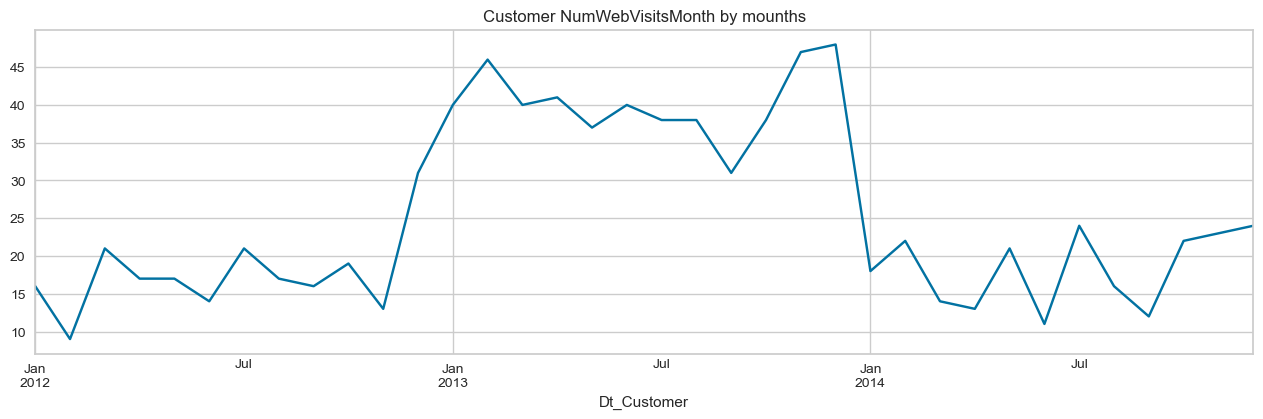

In [46]:
# Website monthly active users line chart
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumWebVisitsMonth by mounths')
groupedDate.NumWebVisitsMonth.plot(kind='line')
plt.show()

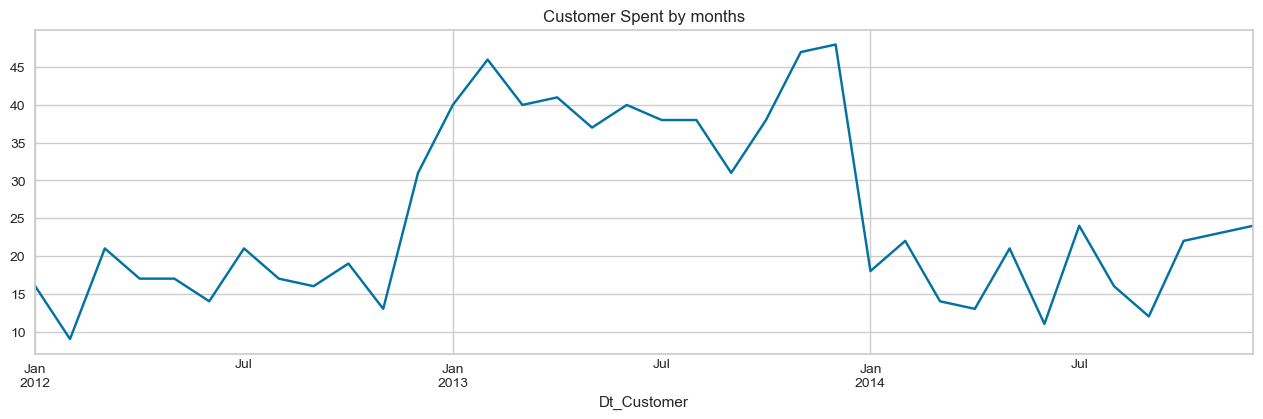

In [48]:
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer Spent by months')
groupedDate.Spent.plot(kind='line')
plt.show()

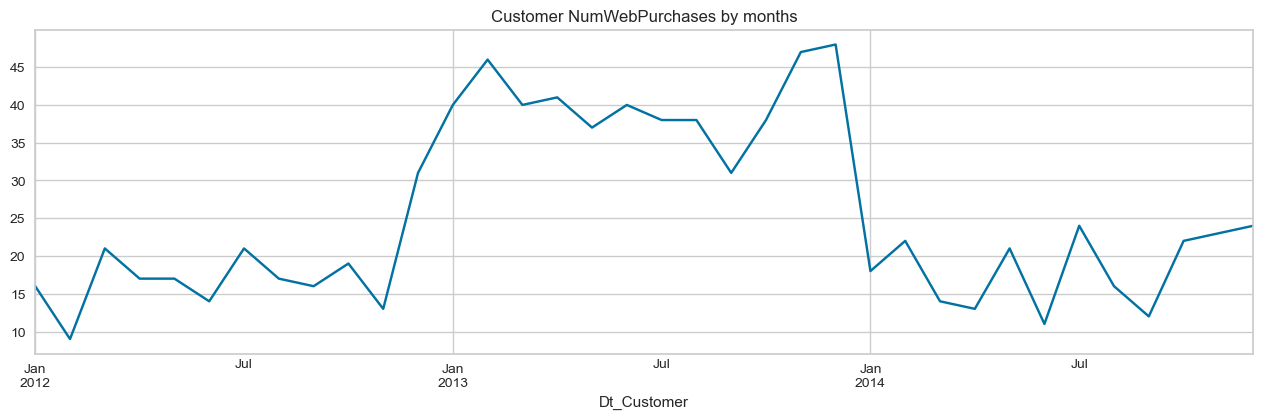

In [50]:
# Line chart of users purchased through the website every month
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumWebPurchases by months')
groupedDate.NumWebPurchases.plot()
plt.show()

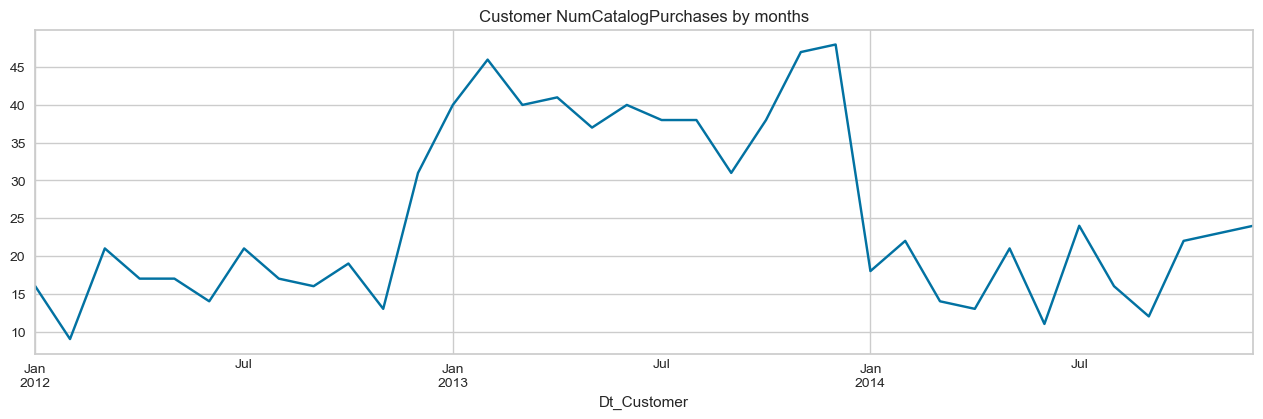

In [52]:
# Line chart of users purchased through the catalog each month
groupedDate = data.set_index('Dt_Customer')
groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumCatalogPurchases by months')
groupedDate.NumCatalogPurchases.plot(kind='line')
plt.show()

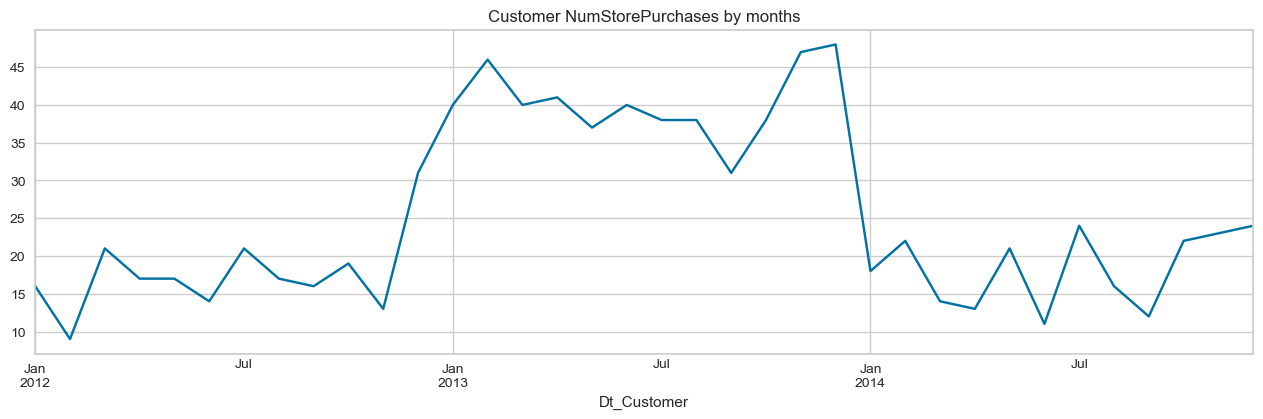

In [54]:
#Monthly discount chart of users purchased through the store
groupedDate = data.set_index('Dt_Customer')

groupedDate = groupedDate.resample('M').count()

plt.figure(figsize=(14,4))
plt.title('Customer NumStorePurchases by months')
groupedDate.NumStorePurchases.plot(kind='line')
plt.show()

Since December 2013, the number of website visits and the total number of transactions on the website has dropped sharply. The three channels of direct purchase through websites, catalogs, and stores all experienced the same trajectory decline.

In [55]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [56]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [61]:
pd.set_option('display.max_columns', None)
data1.corr()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,TotalAcceptedCmp,NumTotalPurchases
Education,1.000000,0.005253,0.144016,-0.002865,-0.010839,0.195600,-0.083850,0.031164,-0.114494,-0.107357,-0.099436,0.029431,0.080333,0.068773,0.068711,-0.039875,0.005452,0.052999,0.030661,-0.011246,0.021257,-0.041915,0.090466,0.183970,0.089177,0.054286,0.033869,0.091782
Marital_Status,0.005253,1.000000,0.008421,0.029256,0.016247,0.007459,-0.001100,0.029756,0.035174,0.016943,0.000022,-0.022320,-0.002089,0.014544,0.001452,-0.030515,-0.027022,0.014527,0.010958,-0.017001,0.018492,0.001817,-0.011231,0.062882,0.019615,-0.018113,-0.003553,-0.000223
Income,0.144016,0.008421,1.000000,0.030626,0.007963,0.685944,0.504859,0.684170,0.518381,0.518161,0.383593,-0.107140,0.450579,0.693660,0.627943,-0.646426,-0.015186,0.217743,0.394258,0.325288,0.104012,-0.027912,0.160990,0.198889,0.789292,-0.340378,0.364452,0.666228
Dt_Customer,-0.002865,0.029256,0.030626,1.000000,-0.009327,0.007133,0.033589,0.025824,0.023096,-0.001025,-0.001000,-0.001927,-0.003916,0.030037,0.001220,-0.047565,-0.013036,0.009117,0.030600,0.007777,-0.041727,0.007739,-0.007179,-0.005210,0.017830,0.014629,0.005966,0.010052
Recency,-0.010839,0.016247,0.007963,-0.009327,1.000000,0.016321,-0.003717,0.023446,0.001314,0.022796,0.017168,-0.000638,-0.010776,0.025226,0.000771,-0.021850,-0.033095,0.018779,0.000844,-0.019367,-0.001811,0.005361,-0.198781,0.019396,0.020842,0.017826,-0.012394,0.005871
MntWines,0.195600,0.007459,0.685944,0.007133,0.016321,1.000000,0.388472,0.561886,0.398956,0.385845,0.386234,0.011173,0.542136,0.634716,0.642313,-0.320287,0.062103,0.373491,0.471949,0.354328,0.206031,-0.035974,0.247280,0.162809,0.891696,-0.351522,0.511880,0.712803
MntFruits,-0.083850,-0.001100,0.504859,0.033589,-0.003717,0.388472,1.000000,0.542030,0.594415,0.567030,0.389999,-0.131792,0.296986,0.487274,0.463136,-0.417405,0.014945,0.010363,0.211996,0.195351,-0.009717,-0.002813,0.125854,0.013657,0.613122,-0.394121,0.159744,0.456026
MntMeatProducts,0.031164,0.029756,0.684170,0.025824,0.023446,0.561886,0.542030,1.000000,0.567813,0.523329,0.348727,-0.122242,0.293502,0.723473,0.479983,-0.539183,0.018250,0.102981,0.372173,0.310053,0.043060,-0.020750,0.236548,0.030729,0.842624,-0.501844,0.308521,0.554253
MntFishProducts,-0.114494,0.035174,0.518381,0.023096,0.001314,0.398956,0.594415,0.567813,1.000000,0.579490,0.422018,-0.139263,0.293424,0.533969,0.459997,-0.445729,0.000302,0.016797,0.198112,0.260866,0.002555,-0.018842,0.111325,0.042359,0.642335,-0.425148,0.177102,0.469309
MntSweetProducts,-0.107357,0.016943,0.518161,-0.001025,0.022796,0.385845,0.567030,0.523329,0.579490,1.000000,0.369084,-0.120064,0.348236,0.490416,0.448673,-0.423215,0.001412,0.028534,0.258797,0.241826,0.009940,-0.020432,0.117263,0.019379,0.602610,-0.382882,0.199622,0.472608


<Axes: >

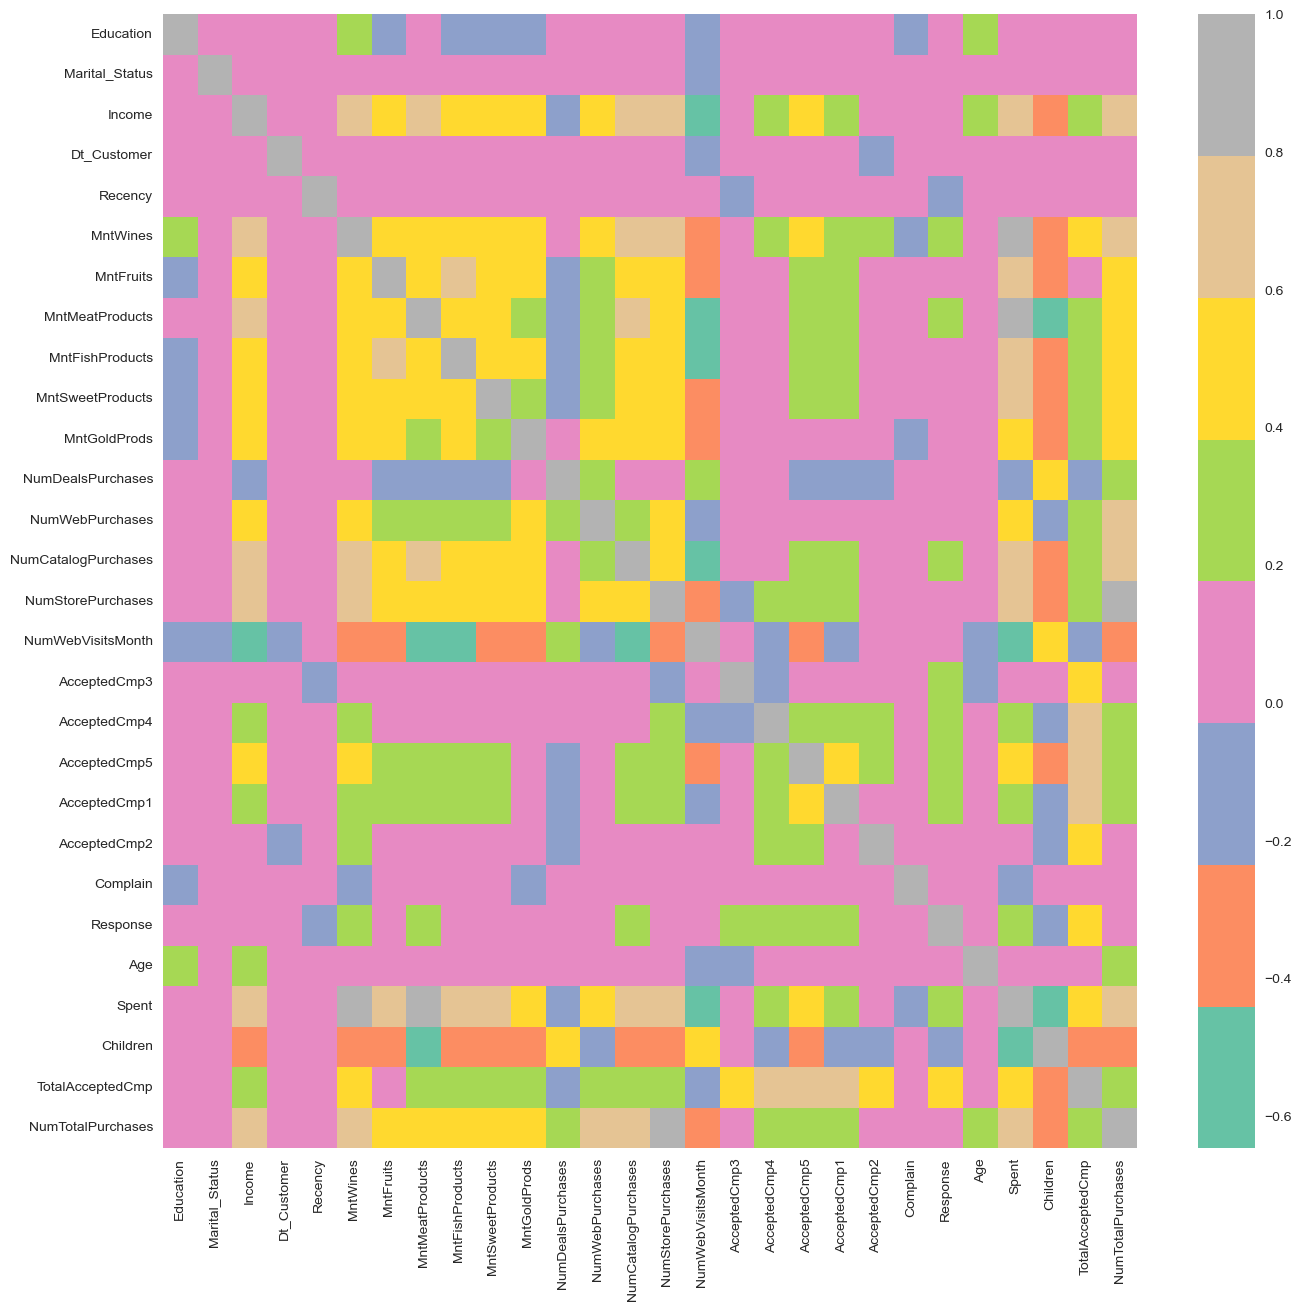

In [58]:
# Correlation heat map
plt.figure( figsize = (14, 14))
data1 = data.iloc[:, 1:-1]
sns.heatmap(data1.corr(), cmap='Set2')

In [62]:
ds = data.copy()

cols_del = ['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 
            'Complain', 'Response', 'Have_Children', 'Dt_Customer',  'Children']
ds = ds.drop(cols_del, axis=1)

In [63]:
# Data standardization
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

## Dimensionality Reduction

In [65]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,2236.0,-3.495514e-17,2.750925,-4.773500,-2.596942,-0.625790,2.415186,7.796490
PC2,2236.0,5.402159e-17,1.364270,-4.446571,-0.928233,-0.238470,0.789286,5.705415
PC3,2236.0,-6.355481e-18,1.172936,-4.114726,-0.777808,0.019402,0.728386,4.888599


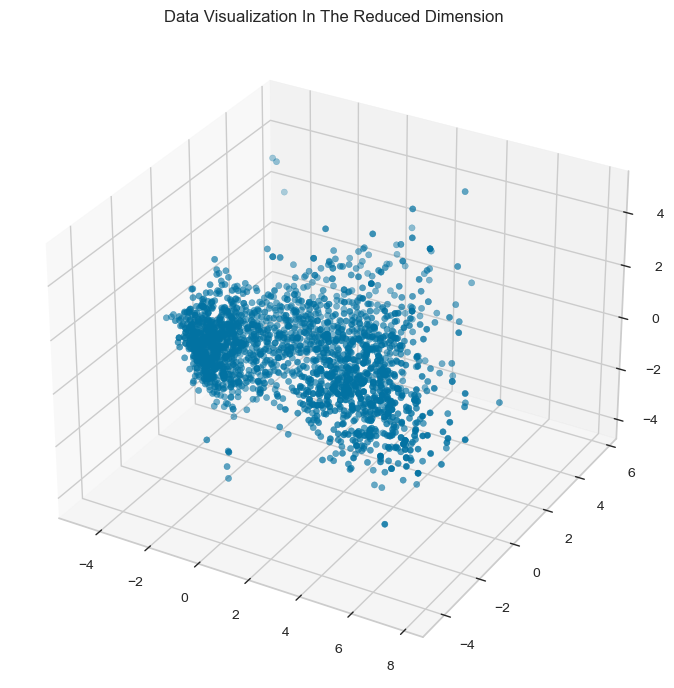

In [66]:
x =PCA_ds["PC1"]
y =PCA_ds["PC2"]
z =PCA_ds["PC3"]

# Data visualization after dimensionality reduction
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("Data Visualization In The Reduced Dimension")
plt.show()

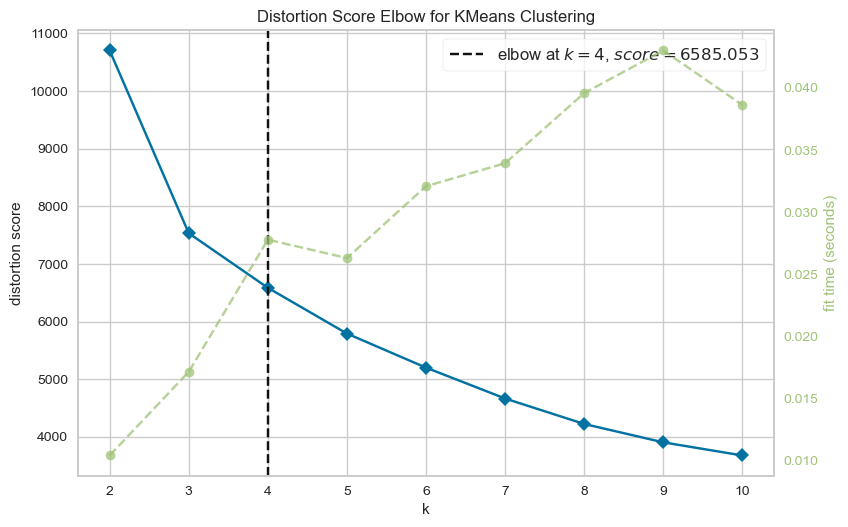

In [68]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()
plt.show()

In [71]:
KM = KMeans(n_clusters=4)

# Fit the model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_KM

# Add clustering features to the original data
data["Clusters"]= yhat_KM

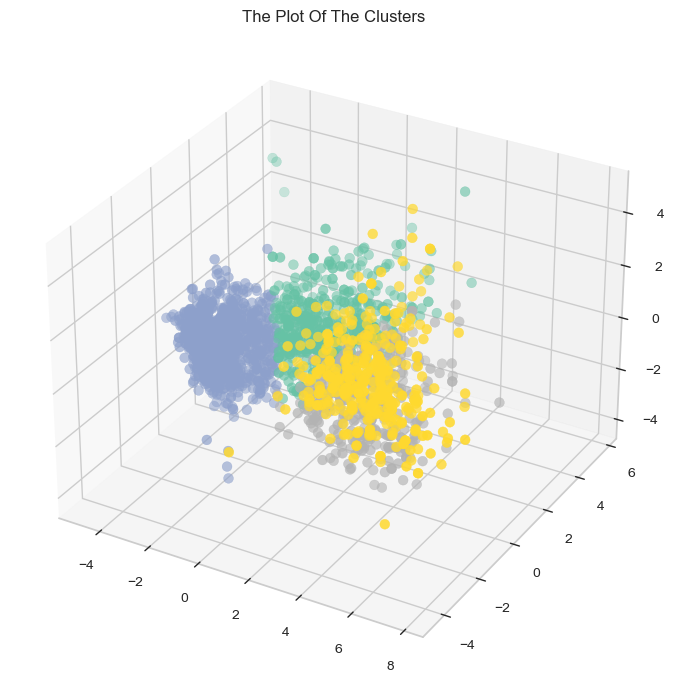

In [73]:
# Visualization of clustering results
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=50, c=PCA_ds["Clusters"], marker='o', cmap = 'Set2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

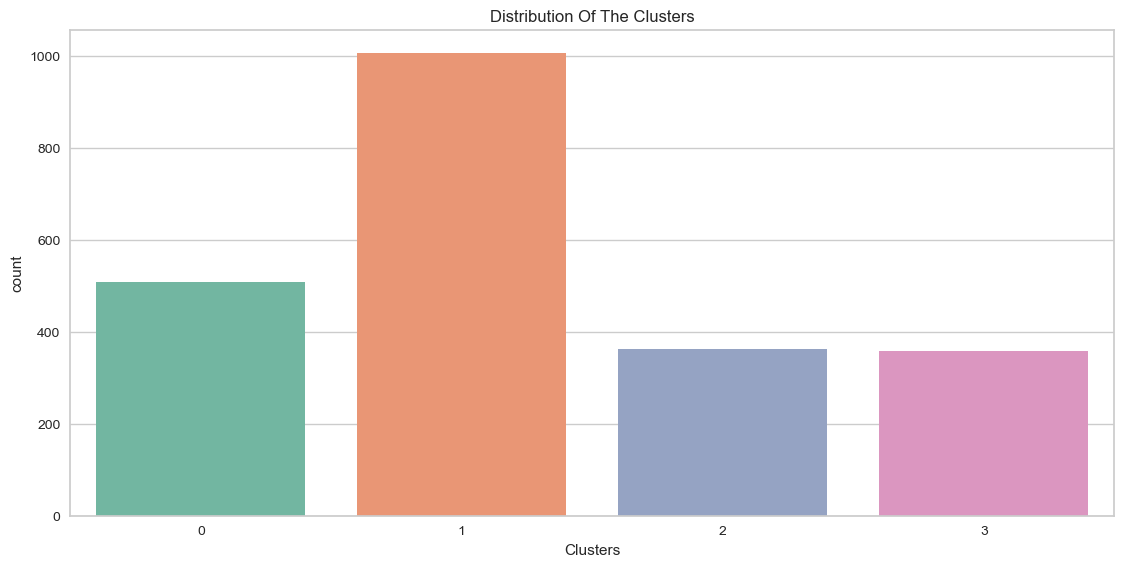

In [74]:
# Distribution map of clustering results
plt.figure(figsize=(12, 6))
pl = sns.countplot(x=data["Clusters"], palette= 'Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()

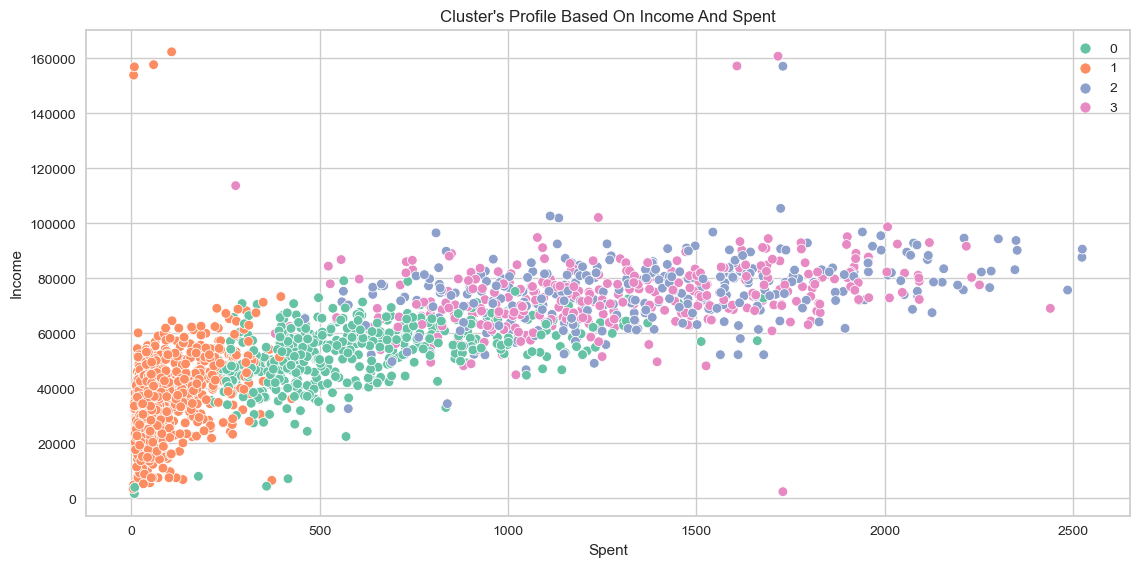

In [75]:
# Visualize the clustering results according to income and expenditure
plt.figure(figsize=(12, 6))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= 'Set2')
pl.set_title("Cluster's Profile Based On Income And Spent")
plt.legend()
plt.show()

- **Cluster 0**: Customers in this cluster have incomes higher than cluster 1 but generally low to moderate spending.They could represent a cautious segment that, despite having the means, might prioritize savings or be selective with their purchases.
  
- **Cluster 1**: This cluster seems to consist of customers with lower incomes who have spent less. They are concentrated towards the bottom left of the graph. This could represent a segment that is price-sensitive or has limited purchasing power.

- **Cluster 2**: Customers in this cluster have higher incomes and higher expenditure.These may be your premium customers who are not as price-sensitive and are likely to purchase more expensive or luxury items.

- **Cluster 3**: This cluster is spread across a wide range of incomes but with moderate to high spending. They representing customers who may have the potential for moderate and higher spend.


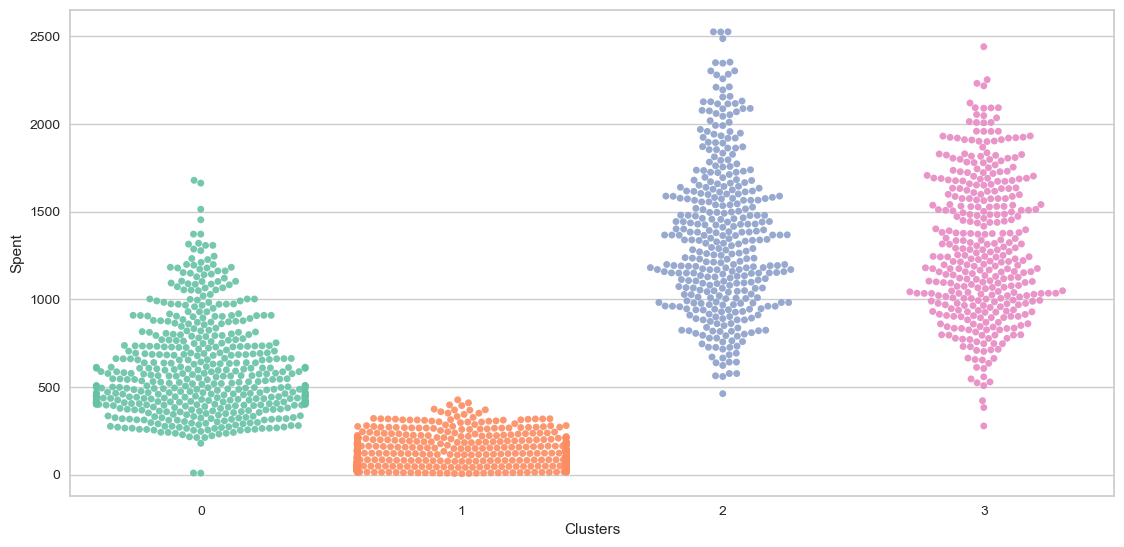

In [78]:
plt.figure(figsize=(12,6))
sns.swarmplot(x=data["Clusters"], y=data["Spent"], alpha=0.9, palette= 'Set2') 
plt.show()

In [81]:
data["TotalAcceptedCmp"] = data["TotalAcceptedCmp"].astype(str)  # Convert to string if necessary
data["Clusters"] = data["Clusters"].astype(str)  # Convert to string if necessary


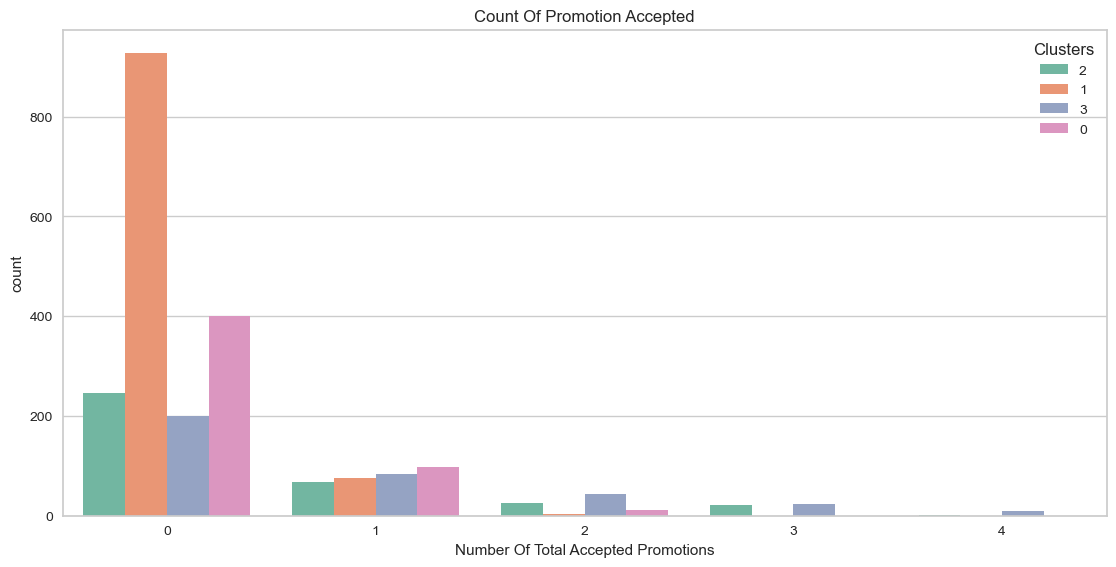

In [82]:
# Visualize the total acceptance of activities according to the clustering results
plt.figure(figsize=(12,6))
pl = sns.countplot(x=data["TotalAcceptedCmp"],hue=data["Clusters"], palette= 'Set2')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()